# Statistiques de corpus

## Préliminaires

Pour mieux comprendre les choix qui s'offrirons à nous par la suite, nous allons commencer par utiliser des outils élémentaires
### Questions
1.Téléchargez le texte qui se trouve à l'URL: "https://gutenberg.org/files/84/84-0.txt". Débarrassez vous des 1457 premiers caractères puis, en utilisant des expressions régulières, débarrassez vous également de la mise en page en paragraphes. Combien de caractères contient ce texte?  
2.Ce roman va constituer notre premier corpus. Nous devons également déterminer ce que nous allons considèrer comme étant des mots. Est-ce que les signes de ponctuations sont des mots? Est-ce que les mots en majuscules sont différents des mots en minuscules? Que faire des contractions signalées par des apostrophes comme par exemple: I'm, don't ? Avec l'option que vous aurez choisie, combien mots contient le corpus? Combien de mots uniques?  
3.Quels sont les 100 mots les plus fréquents? Les 100 mots avec le moins d'occurrences?   
4.Loi de Zipf: Tracez la distribution des fréquences d'occurrences des mots (par exemple vous pouvez utiliser un histogramme).



In [1]:
import requests
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
URL = "https://gutenberg.org/files/84/84-0.txt"
page = requests.get(URL)

In [3]:
text = page.content[1458:].decode()
text[:1000]

'Letter 1\r\n\r\n_To Mrs. Saville, England._\r\n\r\n\r\nSt. Petersburgh, Dec. 11th, 17—.\r\n\r\n\r\nYou will rejoice to hear that no disaster has accompanied the\r\ncommencement of an enterprise which you have regarded with such evil\r\nforebodings. I arrived here yesterday, and my first task is to assure\r\nmy dear sister of my welfare and increasing confidence in the success\r\nof my undertaking.\r\n\r\nI am already far north of London, and as I walk in the streets of\r\nPetersburgh, I feel a cold northern breeze play upon my cheeks, which\r\nbraces my nerves and fills me with delight. Do you understand this\r\nfeeling? This breeze, which has travelled from the regions towards\r\nwhich I am advancing, gives me a foretaste of those icy climes.\r\nInspirited by this wind of promise, my daydreams become more fervent\r\nand vivid. I try in vain to be persuaded that the pole is the seat of\r\nfrost and desolation; it ever presents itself to my imagination as the\r\nregion of beauty and de

# Text preprocessor

In [4]:
"""
# keep words
# new_text = re.sub(r'\W+', r' ', text)
new_text = re.sub(r'\W+', r' ', text)
# digits
new_text = re.sub(r'\d+', r'', new_text)
# underscore
new_text = re.sub(r'\_', r'', new_text)
# multiple space
new_text = re.sub(r'\  +', r' ', new_text)
"""
words = re.split(' |\.|\,|\n|\r|\_|\—|\“|\"|\”|\?|\!|\:|\;|\(|\)|\[|\]', text)
words = [x for x in words if x]
words[:4000]

['Letter',
 '1',
 'To',
 'Mrs',
 'Saville',
 'England',
 'St',
 'Petersburgh',
 'Dec',
 '11th',
 '17',
 'You',
 'will',
 'rejoice',
 'to',
 'hear',
 'that',
 'no',
 'disaster',
 'has',
 'accompanied',
 'the',
 'commencement',
 'of',
 'an',
 'enterprise',
 'which',
 'you',
 'have',
 'regarded',
 'with',
 'such',
 'evil',
 'forebodings',
 'I',
 'arrived',
 'here',
 'yesterday',
 'and',
 'my',
 'first',
 'task',
 'is',
 'to',
 'assure',
 'my',
 'dear',
 'sister',
 'of',
 'my',
 'welfare',
 'and',
 'increasing',
 'confidence',
 'in',
 'the',
 'success',
 'of',
 'my',
 'undertaking',
 'I',
 'am',
 'already',
 'far',
 'north',
 'of',
 'London',
 'and',
 'as',
 'I',
 'walk',
 'in',
 'the',
 'streets',
 'of',
 'Petersburgh',
 'I',
 'feel',
 'a',
 'cold',
 'northern',
 'breeze',
 'play',
 'upon',
 'my',
 'cheeks',
 'which',
 'braces',
 'my',
 'nerves',
 'and',
 'fills',
 'me',
 'with',
 'delight',
 'Do',
 'you',
 'understand',
 'this',
 'feeling',
 'This',
 'breeze',
 'which',
 'has',
 'travell

In [5]:
# nombre de mots
print(len(words))

78146


# Frequency

In [6]:
word_freq = {i:words.count(i) for i in set(words)}
word_freq

{'awaken': 2,
 'tore': 5,
 'sex': 1,
 'handed': 1,
 'mates': 1,
 'zip': 1,
 'NOTICE': 1,
 'wept': 16,
 'Newton': 1,
 'death': 76,
 'instant': 13,
 'did': 115,
 'Friend': 1,
 'the': 4070,
 'ever': 77,
 'describe': 15,
 'law': 10,
 'salubrious': 1,
 'dinner': 1,
 'medium': 6,
 'excessively': 1,
 'repulses': 1,
 'maintaining': 1,
 'plaything': 2,
 'receipt': 2,
 'elevating': 2,
 'consternation': 2,
 'scared': 2,
 'peaceful': 7,
 'spectators': 1,
 'cataract': 1,
 'experimentalist': 1,
 'clay': 1,
 'Tears': 3,
 'position': 1,
 'indelible': 2,
 'nought': 2,
 'heaven-sent': 1,
 'grate': 1,
 'sweet': 22,
 'escape': 9,
 'apartment': 9,
 'undertake': 4,
 'stared': 1,
 'address': 4,
 'extremes': 1,
 'golden': 1,
 'firm': 7,
 'yourself': 28,
 'Heavy': 1,
 'substance': 3,
 'encourage': 2,
 'satiate': 1,
 'capacities': 1,
 'cultivating': 1,
 'self-violence': 1,
 'loose': 8,
 'cursory': 3,
 'alarming': 1,
 'hanging': 7,
 'lose': 8,
 'palpitate': 1,
 'Thank': 1,
 'conversation': 18,
 'Angelica': 1,
 '

In [7]:
len(word_freq.keys())

7919

In [8]:
# word_freq_sorted = dict(sorted(word_freq.items(),key= lambda x:x[1]))

In [9]:
ws, fqs = [], []
for k in word_freq.keys():
    ws += [k]
    fqs += [word_freq[k]]
    
word_freq_dict = {
    "words": ws,
    "freq": fqs
}

In [10]:
df = pd.DataFrame.from_dict(word_freq_dict)
df

,words,freq
0,awaken,2
1,tore,5
2,sex,1
3,handed,1
4,mates,1
...,...,...
7914,collections,1
7915,brook,2
7916,thirsting,1
7917,perseverance,2


In [11]:
df.sort_values(['freq'])[:100]

,words,freq
2538,elementary,1
3075,prepossess,1
3077,arrested,1
3078,ice-rifts,1
3079,begged,1
...,...,...
3159,impossibilities,1
6234,claimed,1
3157,enslave,1
6166,never-dying,1


In [12]:
df.sort_values(['freq'])[-100:]

,words,freq
7252,You,86
2753,Elizabeth,88
5300,those,88
5528,other,89
3187,most,90
...,...,...
2829,to,2156
2296,of,2745
4179,I,2846
4465,and,3000


## Loi de Zipf

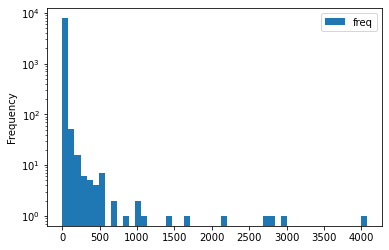

In [13]:
ax = df.plot.hist(bins=50)
ax.set_yscale('log')

## Loi de Heaps

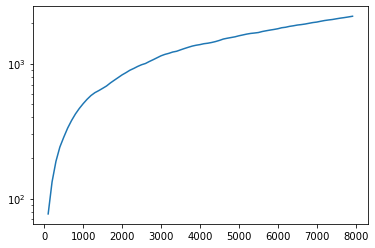

In [14]:
#f, axs = plt.subplots(2, 4, sharey=True, figsize=(15,15))
#ax_i, ax_j = 0, 0
uniq, all_w = [], []
for i in range(100, 8000, 100):
    if i == 7900:
        i = 7919
            
    corpus = words[:i]
    word_freq = {k:corpus.count(k) for k in set(corpus)}
    uniq += [len(word_freq)]
    all_w += [len(corpus)]
    
plt.plot(all_w, uniq)
plt.yscale('log')

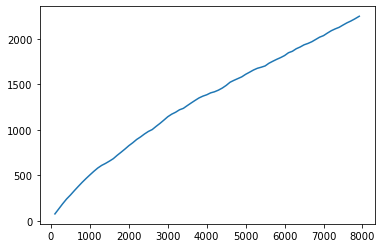

In [15]:
plt.plot(all_w, uniq)

In [16]:
print("all_w", all_w)
print("uniq", uniq)

all_w [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7919]
uniq [77, 133, 189, 241, 285, 333, 379, 424, 466, 506, 545, 581, 610, 632, 657, 684, 721, 755, 790, 827, 859, 895, 923, 955, 983, 1004, 1039, 1072, 1108, 1145, 1173, 1194, 1221, 1237, 1267, 1296, 1324, 1351, 1371, 1386, 1407, 1419, 1437, 1460, 1489, 1524, 1545, 1564, 1583, 1611, 1634, 1658, 1677, 1689, 1703, 1733, 1755, 1776, 1795, 1817, 1848, 1864, 1892, 1911, 1935, 1950, 1969, 1994, 2019, 2036, 2064, 2090, 2110, 2127, 2152, 2176, 2196, 2219, 2249]


In [17]:
from sklearn.linear_model import LinearRegression

all_w = np.log(np.array(all_w).reshape(-1,1))
uniq = np.log(np.array(uniq).reshape(-1,1))

reg = LinearRegression().fit(all_w, uniq)
print(reg.coef_)
print(np.exp(reg.intercept_))

[[0.74983702]]
[2.72546127]


## byte-pair encoding

In [18]:
corpus = words
word_freq = {k:corpus.count(k) for k in set(corpus)}

In [73]:
def byte_pair_encoding(df_word_freq, k=100):
    
    # sort by frequency
    df_word_freq = df_word_freq.sort_values(['freq'], ascending=False)
    
    # split and add '_'
    splited = []
    for w in df_word_freq['words']:
        splited += [list(w) + ['_']] 
    df_word_freq['splitted'] = splited
    
    # build vocab
    vocab = []
    for s in df_word_freq['splitted']:
        for l in s:
            if l not in vocab:
                vocab += [l]
                
    print('initial vocab len:', len(vocab))
    print(vocab)
    print("===================")
    
    for i in range(k):
        tmp_dic = {}
        for w_s in df_word_freq['splitted']:
            for l_i in range(len(w_s)-1):
                
                pattern = w_s[l_i] + w_s[l_i + 1]
                
                if pattern not in tmp_dic.keys():
                    tmp_dic[pattern] = 1
                else:
                    tmp_dic[pattern] += 1
        print(tmp_dic)
        break

In [74]:
byte_pair_encoding(df)

initial vocab len: 75
['t', 'h', 'e', '_', 'a', 'n', 'd', 'I', 'o', 'f', 'm', 'y', 'i', 'w', 's', 'c', 'b', 'u', 'r', 'v', 'T', 'l', 'M', 'B', 'H', 'p', 'g', 'E', 'z', 'Y', 'P', 'j', 'k', 'S', 'C', 'W', 'G', '-', 'J', 'F', 'x', '1', 'A', '’', 'V', 'q', 'O', 'D', 'N', 'æ', 'L', 'U', '3', 'K', '7', '4', 'R', '8', '2', '9', '5', '‘', '*', 'ê', '6', "'", '0', '/', 'Q', 'ô', '%', 'é', '$', 'X', 'è']
{'th': 271, 'he': 310, 'e_': 1234, 'an': 525, 'nd': 354, 'd_': 1378, 'I_': 3, 'of': 45, 'f_': 34, 'to': 154, 'o_': 29, 'my': 14, 'y_': 701, 'a_': 29, 'in': 1333, 'n_': 560, 'wa': 94, 'as': 276, 's_': 1387, 'ha': 217, 'at': 673, 't_': 649, 'me': 340, 'wi': 93, 'it': 401, 'h_': 157, 'ad': 152, 'wh': 46, 'hi': 174, 'ic': 271, 'ch': 227, 'bu': 51, 'ut': 140, 'yo': 20, 'ou': 379, 'u_': 9, 'no': 104, 'ot': 111, 'is': 413, 'fo': 127, 'or': 399, 'r_': 370, 'by': 4, 'on': 789, 'fr': 47, 'ro': 331, 'om': 203, 'm_': 85, 'be': 158, 'av': 102, 've': 421, 'er': 1023, 'we': 118, 're': 1041, 'Th': 23, 'en': 845

Je n'ai pas eu le temps de terminer le dernier algo.  
Il reste la partie merge !